### Group Members:



* Courtney Mueller
* Angel Camacho 
* Matthew Grover 

In [1]:
#importing potentially necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import csv
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import preprocessing
from matplotlib import pyplot as plt

ModuleNotFoundError: No module named 'pandas'

***
## First Dataset: [FirstDataset](https://www.kaggle.com/datasets/jummyegg/rawg-game-dataset/code?resource=download)
#### Display information about rows and columns in dataset:

In [ ]:
df1 = pd.read_csv('game_info.csv') # read in the dataset
print("shape: ", df1.shape) # display dataset information
df1.head() # print first few lines of dataset#
df1

#### Table displaying information for genre:
The above dataset information about various video game titles including its publisher and development company. Below we plot this information and display genre frequency. We base this upon the genre count information given in the dataset as well. Based on the data gathered in our dataset it can be determined that we have a sufficient amount of information on the game titles given in order to produce recommendations

plotting genre frequency \
from the genre count we can see that we have sufficient games to produce reccomendations 

In [ ]:
sns.set(rc={"figure.figsize":(20, 20)}) #width=8, height=4
ax = sns.countplot(x="genres",data=df1)

---


# Second Kaggle Dataset [Second Dataset](https://www.kaggle.com/datasets/gregorut/videogamesales)

Read in data set 

In [ ]:
df2 = pd.read_csv('./Data/vgsales.csv')
print("shape: ",df2.shape)
df2.head()

plot genre freq

In [ ]:
sns.set(rc={"figure.figsize":(20, 20)}) #width=8, height=4
ax = sns.countplot(x="Genre",data=df2)

---


# **Analysis** 

The two datasets that we have chosen for our project have both shown sufficient instances and provide viable statistics for a reliable analysis. While one has a larger variety of genres for nuanced analysis. The second data set has the smaller set of data but also a more concise set of genres, making it easier for us to analyze the data based on genre of game. Having some type of filter system for genre is something we wanted to rely heavily upon for our database analysis so having something that has that implemented prior makes it a little easier on us to conceptualize how we want to bring our project together. After having a meeting and coming together to agree upon the direction we want to take our project in - we decided that the main focus of our project is going to be grouping together game titles based upon genre in hopes to establish a target audience. We are hoping with this target audience we will be able to initiate an increase in willingness to try new game titles based upon recommendations based on our analysis. Due to the nature of this problem, we see our project being a good example of a "clustering" data mining technique

---
### Project: Stage 4

# Inspired by analysis done on kaggle: [Dataset 3](https://www.kaggle.com/code/arthurtok/the-console-wars-ps-vs-xbox-vs-wii)


In [91]:
#clean the data set and drop all non-existing values

# df1 = df1.dropna() # currently commented out because we are not utilizing df1
vgs = df2.dropna()

# use head to display the first and last few rows in the dataset after dropping values
vgs.head

<bound method NDFrame.head of         Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales

In [92]:
# find all unique values within the dataset
vgs.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [93]:
# Dataframe contain info only on the 7th Gen consoles
video7th = vgs[(vgs['Platform'] == 'WiiU') | (vgs['Platform'] == 'XOne') | (vgs['Platform'] == 'PS4')]
video7th.shape

(692, 11)

### Game sales by publisher stage 4 
We want to analyse how publisher may affect sales in regions


In [94]:
# use head to display the first and last few rows in the dataset
vgs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


After running this piece of code we will see that there are no indie games when compared to a list of indie games from Wikipedia. This means in later stages we might want to include a indie game database to include that side of the market.

In [89]:
inlist = False
count =0
with open('./Data/indiegames.txt', 'r') as reader:
    # Read and print the entire file line by line
    line = reader.readline()
    while line != '':  # The EOF char is an empty string
        #print(line, end='')
        line = reader.readline()
        y = line.lower()
        y = y.replace(" ","")
        y.strip()
        for i in vgs['Name']:
            i = i.lower()
            i = i.replace(" ","")
            i.strip()
            if y == i:
                inlist =True
                count+=1
            
if inlist:
    print("there exist some indie games:")
    print("sum of indie games in list: ", count)
else:
    print("no indie games")
        

no indie games


In [95]:
# ensure no non-existent rows that will mess with our data
vgs = vgs.dropna(axis = 0)

From this we can see that there is a large variety of publishers meaning we may want to shrink the number of publishers we are looking at. We produce a csv that shows how many times a unique publisher shows up in the data set. We generate a new csv with that data. 

In [96]:
#generate a new list that may be easier to use in code
countlist = vgs['Publisher'].value_counts()
print(countlist)

# generate a new csv code for count data - we commented out to prevent constant writes
# count = vgs.groupby(['Publisher']).count()
# count.head()
# count.to_csv('./Data/publishercount.csv')

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Detn8 Games                        1
Pow                                1
Navarre Corp                       1
MediaQuest                         1
UIG Entertainment                  1
Name: Publisher, Length: 576, dtype: int64


# Pie Chart
Below is a pie chart to describe the three major video game platforms that we will be using for our analysis. These values represent the total number of Global Sales for each platform, as well as the total number of individual users that contributed to the sales total. These two total values (global sales / users) were added together and the sum is represented in the pie chart.

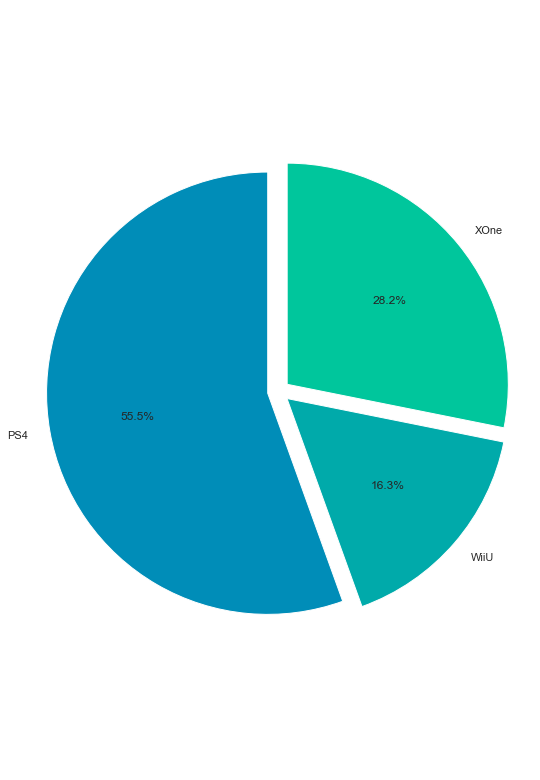

In [97]:
# Plotting our pie charts
# Create a list of colors
plt.style.use('seaborn-white')
colors = ['#008DB8','#00AAAA','#00C69C']
plt.figure(figsize=(15,11))
plt.subplot(121)
plt.pie(
    video7th.groupby('Platform').Global_Sales.sum(),
    # with the labels being platform
    labels=video7th.groupby('Platform').Global_Sales.sum().index,
    # with no shadows
    shadow=False,
    # stating our colors
    colors=colors,
    explode=(0.05, 0.05, 0.05),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%'
)

plt.axis('equal')
plt.tight_layout()
plt.show()

# Headmap Diagram
We use the heat map created below to analyze the correlations between all values given within our dataset. We do so by extracting all the columns that contain numeric values and add this to its own list. We will put this new piece of information into its own dataset to better separate and explore these values. "Critic_Score" and "User_Score" columns were used as the first point for plotting because they are useful for observing how two variables can be distributed. Any value above 0.4 can be considered to have a correlation between values.

<AxesSubplot:title={'center':'Pearson Correlation of Video Game Numerical Features'}>

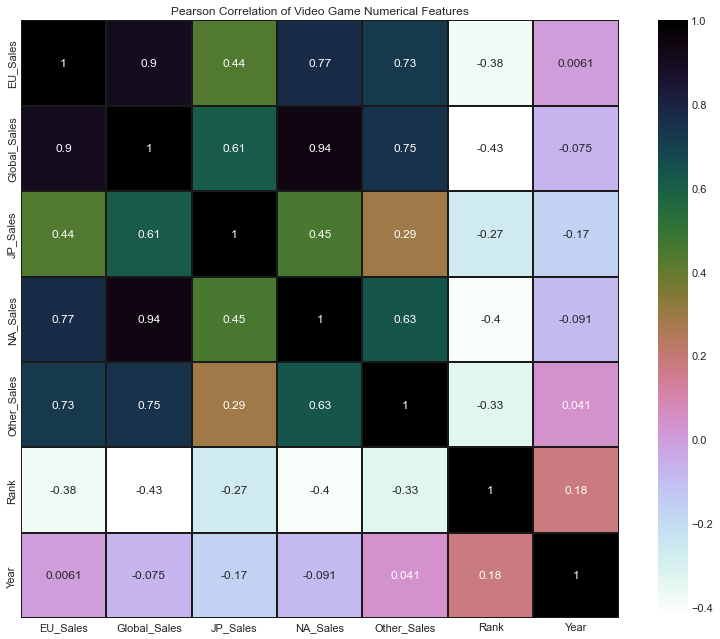

In [98]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in vgs.iteritems():
    if type(colvalue[2]) == str:
        str_list.append(colname)
# Get to the numeric columns by inversion
num_list = vgs.columns.difference(str_list)
# Create Dataframe containing only numerical features
video_num = vgs[num_list]
f, ax = plt.subplots(figsize=(14, 11))
plt.title('Pearson Correlation of Video Game Numerical Features')
# Draw the heatmap using seaborn
sns.heatmap(video_num.astype(float).corr(),linewidths=0.25,vmax=1.0,
            square=True, cmap="cubehelix_r", linecolor='k', annot=True)

# Bar Chart for Global Sales
Below we use a bar chat to describe and showcase the total number of sales globally for each console. Using this data we can identify if there are any trends amongst timeframe, location, demographic comparative to video gaming platform type. We use a stacked bar graph in order to display all of this information reasonably.

Text(0, 0.5, 'Global Sales')

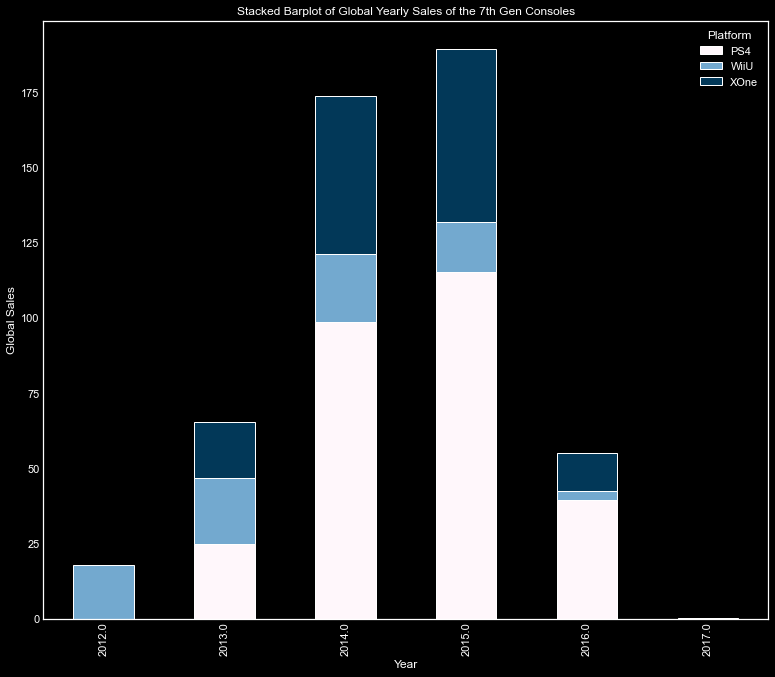

In [99]:
plt.style.use('dark_background')
yearlySales = video7th.groupby(['Year','Platform']).Global_Sales.sum()
yearlySales.unstack().plot(kind='bar',stacked=True, colormap= 'PuBu',
                           grid=False,  figsize=(13,11))
plt.title('Stacked Barplot of Global Yearly Sales of the 7th Gen Consoles')
plt.ylabel('Global Sales')

# Bar Chart for Genre
Below we use a bar graph to describe and analyze the data by taking a look at the sales that were made by all three consoles. There is a group for each genre of video game, and the bar chart goes into detail about the sales per console as well as what genre was more popular for each. By looking at this analysis we can determine what differentiates one console from another and the unique characteristics about each of them. To do this we aggregate and group the data using the "groupby" method and calling it upon both the Genre and Platform features in our data.

Text(0, 0.5, 'Sales')

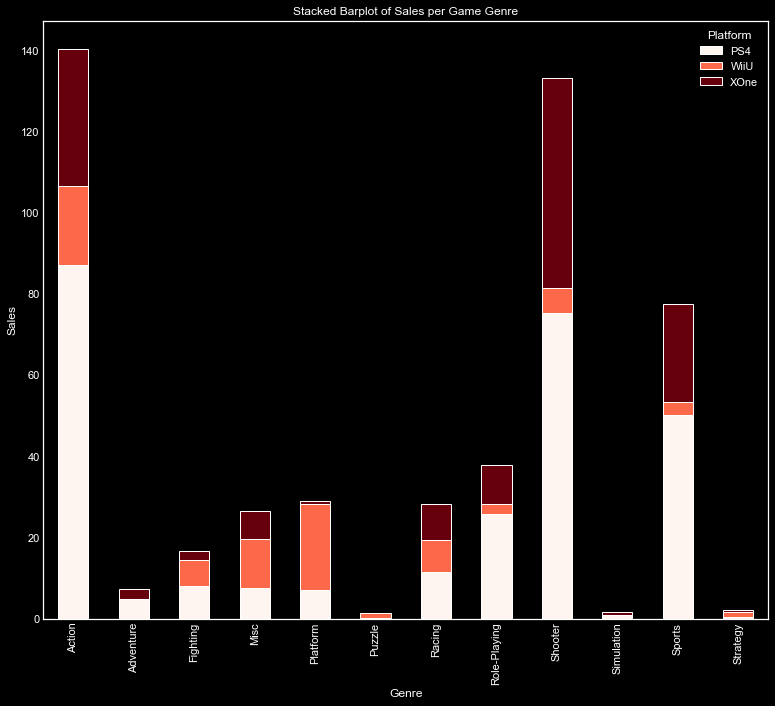

In [100]:
plt.style.use('dark_background')
genreSales = video7th.groupby(['Genre','Platform']).Global_Sales.sum()
genreSales.unstack().plot(kind='bar',stacked=True,  colormap= 'Reds',
                          grid=False, figsize=(13,11))
plt.title('Stacked Barplot of Sales per Game Genre')
plt.ylabel('Sales')

# Bar Chart for Global Sales
Below we use a bar chat to describe and showcase the total number of sales globally for each console. Using this data we can identify if there are any trends amongst timeframe, location, demographic comparative to video gaming platform type. We use a stacked bar graph in order to display all of this information reasonably.

Text(0, 0.5, 'Global Sales')

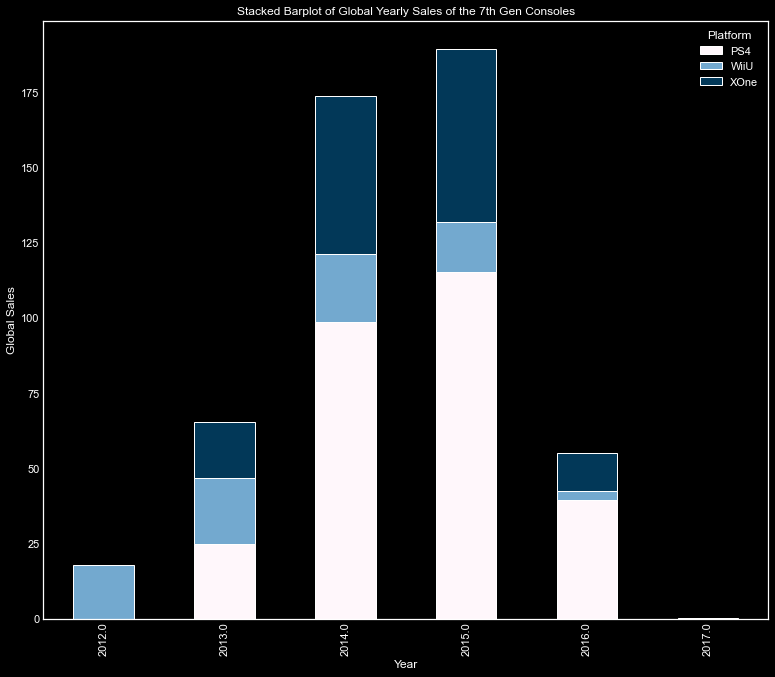

In [101]:
plt.style.use('dark_background')
yearlySales = video7th.groupby(['Year','Platform']).Global_Sales.sum()
yearlySales.unstack().plot(kind='bar',stacked=True, colormap= 'PuBu',
                           grid=False,  figsize=(13,11))
plt.title('Stacked Barplot of Global Yearly Sales of the 7th Gen Consoles')
plt.ylabel('Global Sales')

# Bar Chart for Genre
Below we use a bar graph to describe and analyze the data by taking a look at the sales that were made by all three consoles. There is a group for each genre of video game, and the bar chart goes into detail about the sales per console as well as what genre was more popular for each. By looking at this analysis we can determine what differentiates one console from another and the unique characteristics about each of them. To do this we aggregate and group the data using the "groupby" method and calling it upon both the Genre and Platform features in our data.

Text(0, 0.5, 'Sales')

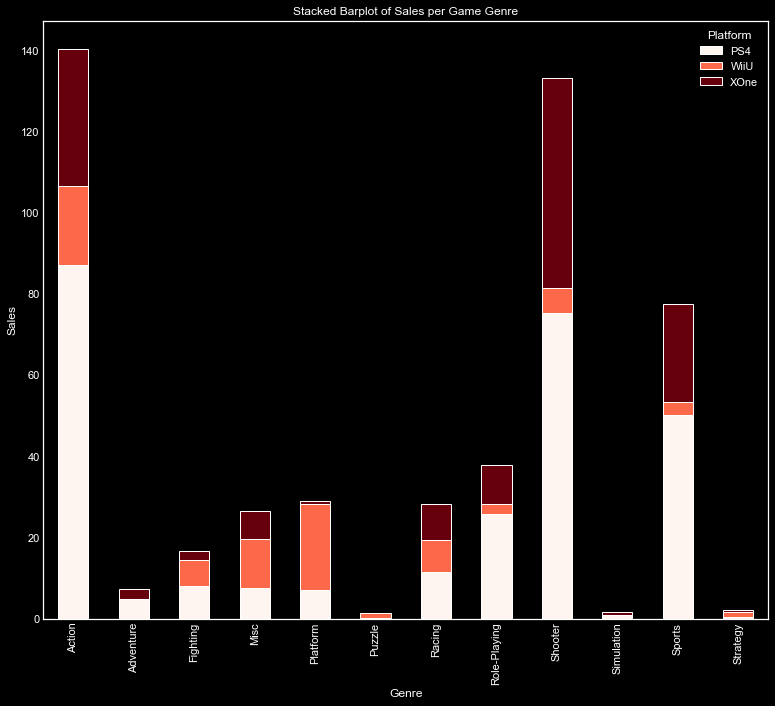

In [102]:
plt.style.use('dark_background')
genreSales = video7th.groupby(['Genre','Platform']).Global_Sales.sum()
genreSales.unstack().plot(kind='bar',stacked=True,  colormap= 'Reds',
                          grid=False, figsize=(13,11))
plt.title('Stacked Barplot of Sales per Game Genre')
plt.ylabel('Sales')

### Approach
We want to use association rules. This will allow us to gain the market understanding, for example EA → NA sales and Nintendo → Japan sales. The data we have is somewhat similar to market data and if we are to look at an association style of analysis, it can be used in similar situations in real applications. Due to this, we foresee using an association style of analysis for completing the rest of our data analysis for this project. In order to do this we want to further clean our data sets and perhaps find a wider set of publishers via an indie games database to help our solution be cleaner. We want to do this because the above dataset given is extensive but the one caveat is that the database does not contain any numeric values for sales, or any information in general making this the one area of video-game sales not currently being covered in our previous data examination.

# Bar Chart for Global Sales
Below we use a bar chat to describe and showcase the total number of sales globally for each console. Using this data we can identify if there are any trends amongst timeframe, location, demographic comparative to video gaming platform type. We use a stacked bar graph in order to display all of this information reasonably.

Text(0, 0.5, 'Global Sales')

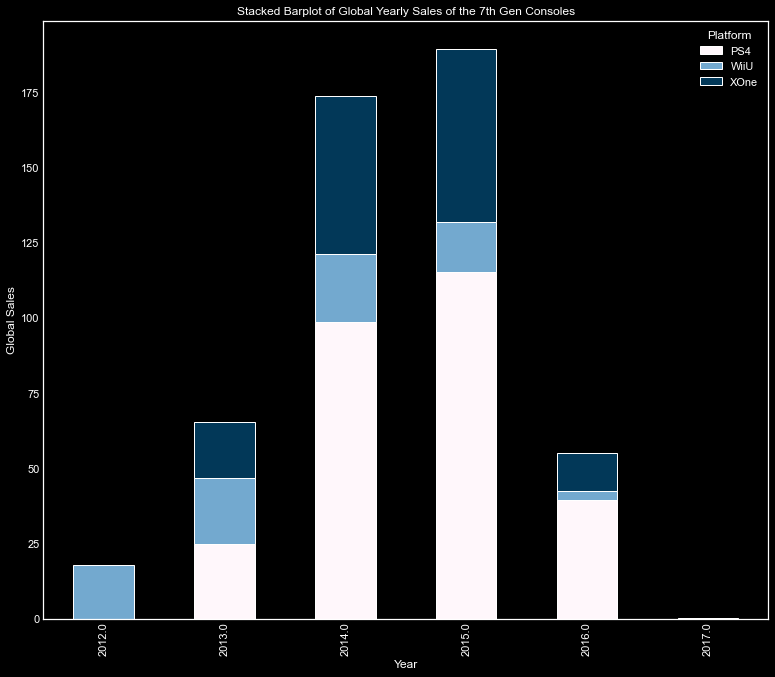

In [ ]:
plt.style.use('dark_background')
yearlySales = video7th.groupby(['Year','Platform']).Global_Sales.sum()
yearlySales.unstack().plot(kind='bar',stacked=True, colormap= 'PuBu',
                           grid=False,  figsize=(13,11))
plt.title('Stacked Barplot of Global Yearly Sales of the 7th Gen Consoles')
plt.ylabel('Global Sales')

# Bar Chart for Genre
Below we use a bar graph to describe and analyze the data by taking a look at the sales that were made by all three consoles. There is a group for each genre of video game, and the bar chart goes into detail about the sales per console as well as what genre was more popular for each. By looking at this analysis we can determine what differentiates one console from another and the unique characteristics about each of them. To do this we aggregate and group the data using the "groupby" method and calling it upon both the Genre and Platform features in our data.

Text(0, 0.5, 'Sales')

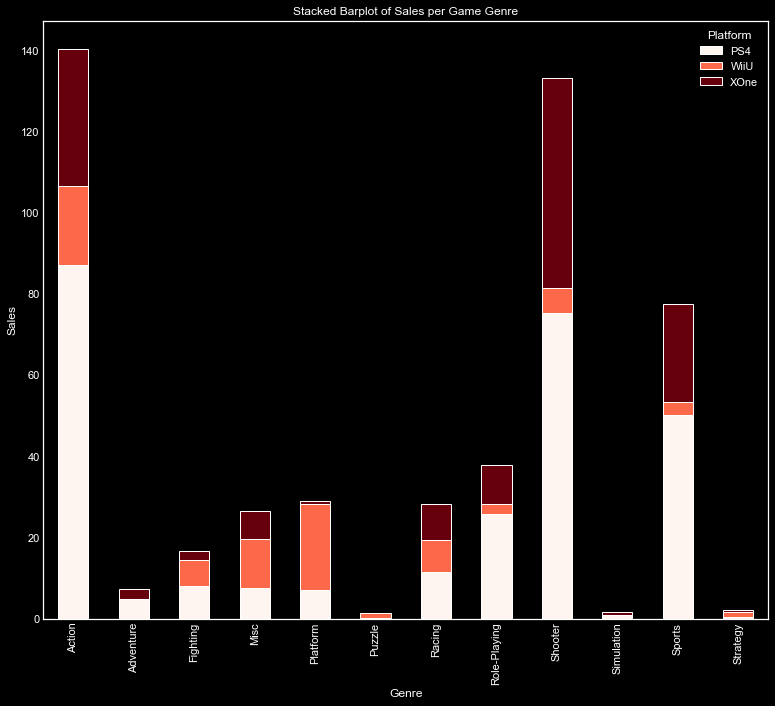

In [ ]:
plt.style.use('dark_background')
genreSales = video7th.groupby(['Genre','Platform']).Global_Sales.sum()
genreSales.unstack().plot(kind='bar',stacked=True,  colormap= 'Reds',
                          grid=False, figsize=(13,11))
plt.title('Stacked Barplot of Sales per Game Genre')
plt.ylabel('Sales')

### approach
we want to use association rules. This will allow us to gain the market understanding that we want for example EA->NA sales and Nintendo -> japan sales. The data we have is somewhat similair to market data and the association style of analysis is used in similair situations in real applications. In order to do this we want to further clean our data sets and perhaps find a wider set of publishers via a indie games database to help our solution be cleaner. 